In [81]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 1st order ODE
## Air resistance for a freely falling body
$\dot{v}=\frac{mg-\frac{1}{2}\rho{}v^2AC_D}{m}$

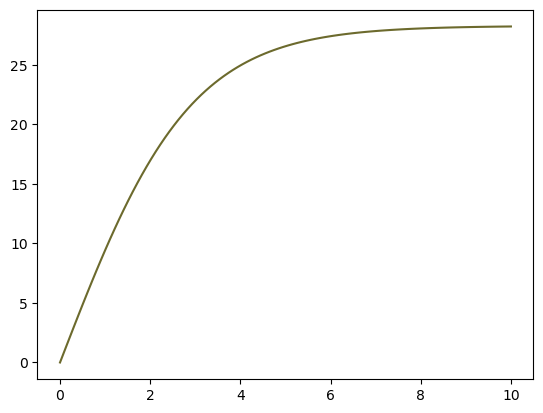

In [92]:
rho=1.225
A=1
Cd=1
m=50
g=9.8

def dvdt(v,t,rho,A,Cd,m,g):
    return (m*g-0.5*tho*v**2*A*Cd)/m

v0=0

sol=odeint(dvdt,y0=v0,t=t,args=(rho,A,Cd,m,g))

t=np.linspace(0,10,100)

plt.plot(t,sol,c="#6C6A2D")

# Coupled 1st order ODE
$\dot{y_1}=y_1+y_2^2+3x$  
$\dot{y_2}=3y_1+y_2^3-\cos(x)$

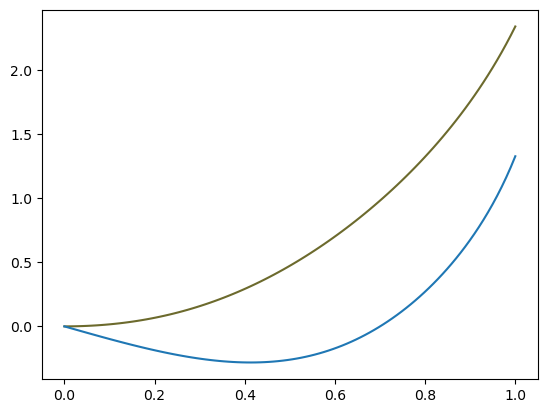

In [83]:
#Coupled 1st order ODE

def dsdx(S,x):
    y1,y2=S
    return [y1 + y2**2  + 3*x,3*y1 + y2**3 - np.cos(x)]
y1_0=0
y2_0=0
S_0=(y1_0,y2_0)

x=np.linspace(0,1,100)

sol=odeint(dsdx,y0=S_0,t=x)

sol_y1=sol.T[0]
sol_y2=sol.T[1]

plt.plot(x,sol_y1,c="#6C6A2D")
plt.plot(x,sol_y2)

# 2nd order ODE  
$\ddot{x}=-\dot{x}^2+\sin(x)$  
$\Downarrow$  
$\dot{x}=v$    
$\dot{v}=-v^2+\sin(x)$


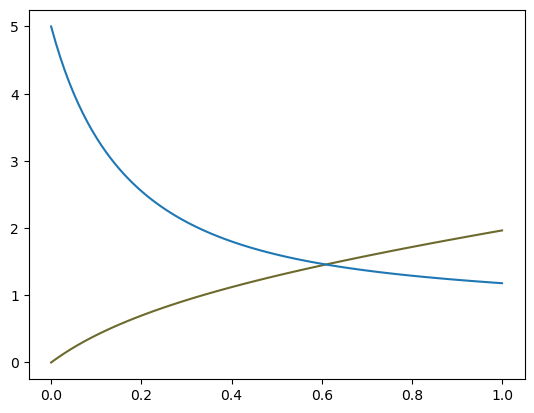

In [84]:
#2nd order ODE

def dsdx(S,x):
    x,v=S
    return[v,-(v**2)+np.sin(x)]

x_0=0
v_0=5
S_0=(x_0,v_0)

x=np.linspace(0,1,100)

sol=odeint(dsdx,y0=S_0,t=x)

sol_x=sol.T[0]
sol_v=sol.T[1]

plt.plot(x,sol_x,c="#6C6A2D")
plt.plot(x,sol_v)

# Application  
## Damped Oscillations  
$\ddot{x}+2\beta\dot{x}+\omega^2_0x=0$  
$\Downarrow$  
$\dot{x}=v$  
$\dot{v}=-2\beta{}v-\omega^2_0x$

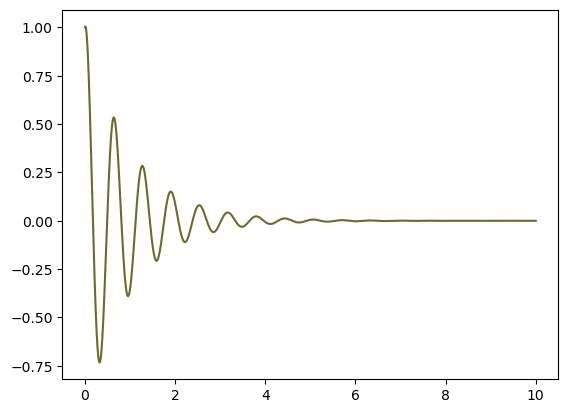

In [85]:
omega0=10
beta=1

omega=np.sqrt(omega0**2-beta**2)

def dsdt(S,t,omega0,beta):
    x,v=S
    return[v,-2*beta*v-omega0**2*x]

x_0=1
v_0=1
S_0=(x_0,v_0)

t=np.linspace(0,10,10000)

sol=odeint(dsdt,y0=S_0,t=t,args=(omega0,beta))

sol_x=sol.T[0]
sol_v=sol.T[1]

plt.plot(t,sol_x,c="#6C6A2D")